In [1587]:
# Importing the necessary Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import statistics

import plotly.graph_objects as go 
import plotly.express as px 
%matplotlib inline

# Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor

# Model Performance
from sklearn.metrics import mean_squared_error, r2_score

# Data 
## Import data


In [1588]:
# To import/read the raw data csv dataset (df1)
df1 = pd.read_csv(r'C:\Users\Admin\Desktop\REAL_ESTATE_PREDICTION\SergeMartin_HousePrice_Prediction\data_analysis\df1.csv')

In [1589]:
# To check the head of the raw data (df1) dataset
df1.head()

,ID,Type,Sub type,Price,NetHabitableSurface(msq),BedroomCount,Province,locality,Region,PostCode,street,Floor,RegionCode,IsIsolated,HasSeaView,SchoolDistance,ShopDistance,TransportDistance,NetHabitableSurface,TotalRoomCount,HasAttic,HasBasement,HasDiningRoom,BuildingCondition,ConstructionYear,FacadeCount,HasLift,FloodZoneType,HeatingType,IsDoubleGlaze,HasBalcony,HasGarden,GardenArea,KitchekType,LivingRoomArea
0,10128188,HOUSE,HOUSE,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,Sparrenweg,NaN,FLANDERS,NaN,NaN,0.0,0.0,0.0,148.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,True,NaN,True,347.0,NaN,NaN
1,10128189,HOUSE,HOUSE,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,Ruddelstraat,NaN,FLANDERS,NaN,NaN,0.0,0.0,0.0,148.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,True,NaN,True,347.0,NaN,NaN
2,10128190,HOUSE,HOUSE,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,Ruddelstraat,NaN,FLANDERS,NaN,NaN,0.0,0.0,0.0,148.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,True,NaN,True,346.0,NaN,NaN
3,10128191,HOUSE,HOUSE,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,Ruddelstraat,NaN,FLANDERS,NaN,NaN,0.0,0.0,0.0,148.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,True,NaN,True,346.0,NaN,NaN
4,10128192,HOUSE,HOUSE,378242.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,Ruddelstraat,NaN,FLANDERS,NaN,NaN,0.0,0.0,0.0,148.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,True,NaN,True,589.0,NaN,NaN


In [1590]:
# To check the number of rows and columns
df1.shape

(21047, 35)

In [1591]:
#To check some statistics
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,21047.0,1.014885e+07,11541.858189,10128188.0,10139022.5,10149580.0,10157350.5,10168916.0
Price,19434.0,3.966239e+05,403465.788486,1385.0,230000.0,315000.0,445000.0,29650000.0
NetHabitableSurface(msq),18086.0,1.604551e+02,222.093157,11.0,93.0,130.0,186.0,17842.0
BedroomCount,20571.0,2.990229e+00,13.456484,1.0,2.0,3.0,3.0,1919.0
Floor,6544.0,3.009169e+00,17.840084,1.0,1.0,2.0,3.0,999.0
SchoolDistance,16608.0,1.100870e+02,369.944464,0.0,0.0,0.0,0.0,9000.0
ShopDistance,16608.0,9.721712e+01,572.958539,0.0,0.0,0.0,0.0,15000.0
TransportDistance,16608.0,2.712482e+01,122.046176,0.0,0.0,0.0,0.0,3700.0
NetHabitableSurface,18086.0,1.604551e+02,222.093157,11.0,93.0,130.0,186.0,17842.0
TotalRoomCount,1355.0,6.740221e+00,4.171947,1.0,4.0,6.0,8.0,40.0


In [1592]:
#To get all the column names in the dataset
df1.columns    

Index(['ID', 'Type', 'Sub type', 'Price', 'NetHabitableSurface(msq)',
       'BedroomCount', 'Province', 'locality', 'Region', 'PostCode', 'street',
       'Floor', 'RegionCode', 'IsIsolated', 'HasSeaView', 'SchoolDistance',
       'ShopDistance', 'TransportDistance', 'NetHabitableSurface',
       'TotalRoomCount', 'HasAttic', 'HasBasement', 'HasDiningRoom',
       'BuildingCondition', 'ConstructionYear', 'FacadeCount', 'HasLift',
       'FloodZoneType', 'HeatingType', 'IsDoubleGlaze', 'HasBalcony',
       'HasGarden', 'GardenArea', 'KitchekType', 'LivingRoomArea'],
      dtype='object')

In [1593]:
# STEP 1: Data Cleaning

# To count number of duplicate rows (1379 rows of duplicated)
print(df1.duplicated().sum())

1379


In [1594]:
# Removal of duplicated rows (No duplicates)

df1 = df1.drop_duplicates(keep='last')
df1.shape

(19668, 35)

In [1595]:
#To Check for Missing Values

#To check the percentage of missing values per column in the dataset
df1_percent_missing = df1.isnull().sum() * 100 / len(df1)
df1_percent_missing

ID                            0.000000
Type                          0.000000
Sub type                      0.000000
Price                         7.407972
NetHabitableSurface(msq)     14.317673
BedroomCount                  2.298149
Province                      3.543828
locality                      0.000000
Region                        3.543828
PostCode                      0.000000
street                       20.962986
Floor                        68.944478
RegionCode                    3.543828
IsIsolated                   70.490136
HasSeaView                   99.933903
SchoolDistance               20.510474
ShopDistance                 20.510474
TransportDistance            20.510474
NetHabitableSurface          14.317673
TotalRoomCount               93.751271
HasAttic                     87.182225
HasBasement                  60.555217
HasDiningRoom                83.572300
BuildingCondition            33.562131
ConstructionYear             43.771609
FacadeCount              

In [1596]:
# Creating a New Dataset(df2) following the deletion of unwanted columns and keeping the original raw data(df1) untouched

# Drop/Remove Columns which are not needed and with morethen 65% missingness 
df2 = df1
df2 = df2.drop(['PostCode', 'ID','street','Province','locality','IsDoubleGlaze','Sub type','IsIsolated','LivingRoomArea','Floor','ShopDistance','TransportDistance','RegionCode','HasAttic','HasLift','FloodZoneType','HasDiningRoom','GardenArea','HasBalcony','HasSeaView','hasSwimmingpool','SchoolDistance','TotalRoomCount','FloodZoneType','FacadeCount','HasSeaView ','propertySubtype', 'atticSurface', 'diningroomSurface', 'rooms', 'floors'], axis=1, errors='ignore')


In [1597]:
# Data rows/columns after dropping unwanted columns HasBalcony
df2.shape

(19668, 12)

<AxesSubplot:ylabel='Frequency'>

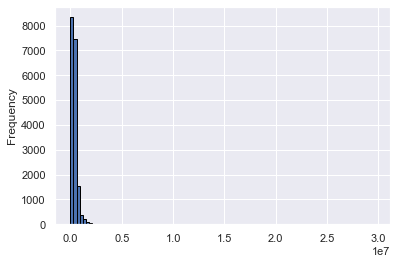

In [1598]:
#plotting the Price column using histogram to assess the shape and distribution of the variable

df2['Price'].plot(kind='hist', bins=100, edgecolor='black')

In [1599]:
# Removing Outline Price Value, rmoving price greater than 1995000.0
#df2 = df2 [df2 ["Price"]<2000000.0]
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,18211.0,395850.930811,407020.425225,1385.0,230000.0,315000.0,443887.5,29650000.0
NetHabitableSurface(msq),16852.0,160.624199,228.347127,11.0,93.0,130.0,186.0,17842.0
BedroomCount,19216.0,2.996669,13.917847,1.0,2.0,3.0,3.0,1919.0
NetHabitableSurface,16852.0,160.624199,228.347127,11.0,93.0,130.0,186.0,17842.0
ConstructionYear,11059.0,1984.116376,85.687950,1753.0,1961.0,1989.0,2021.0,9999.0


<AxesSubplot:ylabel='Frequency'>

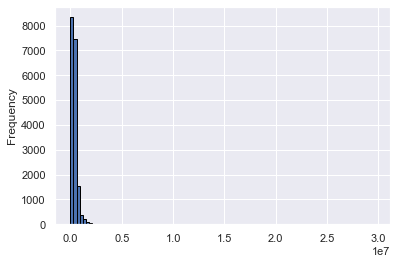

In [1600]:
df2['Price'].plot(kind='hist', bins=100, edgecolor='black')

In [1601]:
df2.BuildingCondition.unique()

array([nan, 'GOOD', 'AS_NEW', 'TO_RENOVATE', 'TO_BE_DONE_UP',
       'JUST_RENOVATED', 'TO_RESTORE'], dtype=object)

In [1602]:
# Print the columns that were dropped
dropped = df2.drop(columns=df2.columns)
print(dropped.columns)

Index([], dtype='object')


In [1603]:
# Replacing NaN to Good in the building condition column
# df2['BuildingCondition'] = df2['BuildingCondition'].fillna('GOOD') wrong

# Dropping the NaN in the BuildingCondition Column
df2.dropna(subset=['BuildingCondition'], how='all', inplace=True)

# Checking to see if the NaN has been dropped 
df2.BuildingCondition.unique()

array(['GOOD', 'AS_NEW', 'TO_RENOVATE', 'TO_BE_DONE_UP', 'JUST_RENOVATED',
       'TO_RESTORE'], dtype=object)

In [1604]:
df2.NetHabitableSurface.unique()

array([6.5000e+02, 1.1000e+03, 5.8000e+01, 6.5000e+01, 8.5000e+01,
       6.9000e+01, 1.6500e+02, 2.6000e+01, 1.2000e+02, 2.2000e+02,
       4.2500e+02, 9.6000e+01, 8.0000e+01, 1.5000e+02, 2.2900e+02,
              nan, 1.0600e+02, 8.3000e+01, 2.0000e+02, 1.2400e+02,
       8.6000e+01, 4.5000e+01, 9.4000e+01, 4.4400e+02, 2.3900e+02,
       6.8000e+01, 1.4500e+02, 2.1600e+02, 9.0000e+01, 4.4000e+01,
       1.5300e+02, 3.1500e+02, 2.6000e+02, 9.5000e+01, 9.1000e+01,
       1.5200e+02, 1.5100e+02, 1.6200e+02, 6.0000e+01, 1.9100e+02,
       1.4300e+02, 2.5800e+02, 1.3100e+02, 2.7300e+02, 8.7000e+01,
       1.1600e+02, 1.9200e+02, 1.9000e+02, 2.1000e+02, 1.4900e+02,
       1.1500e+02, 1.1800e+02, 2.5000e+02, 1.6000e+02, 2.4200e+02,
       2.6200e+02, 5.0000e+01, 1.0000e+02, 9.8000e+01, 1.4800e+02,
       1.3800e+02, 2.4500e+02, 2.6800e+02, 1.6300e+02, 7.0000e+01,
       6.4000e+01, 6.2000e+01, 1.5700e+02, 1.8500e+02, 4.7000e+01,
       4.0000e+02, 2.6500e+02, 1.2500e+02, 5.1600e+02, 2.7500e

In [1605]:
# Dropping NaN in theNetHabitableSurface Column
df2.dropna(subset=['NetHabitableSurface'], how='all', inplace=True)
df2.NetHabitableSurface.unique()

array([6.5000e+02, 1.1000e+03, 5.8000e+01, 6.5000e+01, 8.5000e+01,
       6.9000e+01, 1.6500e+02, 2.6000e+01, 1.2000e+02, 2.2000e+02,
       4.2500e+02, 9.6000e+01, 8.0000e+01, 1.5000e+02, 2.2900e+02,
       1.0600e+02, 8.3000e+01, 2.0000e+02, 1.2400e+02, 8.6000e+01,
       4.5000e+01, 9.4000e+01, 4.4400e+02, 2.3900e+02, 6.8000e+01,
       1.4500e+02, 2.1600e+02, 9.0000e+01, 4.4000e+01, 1.5300e+02,
       3.1500e+02, 2.6000e+02, 9.5000e+01, 9.1000e+01, 1.5200e+02,
       1.5100e+02, 1.6200e+02, 6.0000e+01, 1.9100e+02, 1.4300e+02,
       2.5800e+02, 1.3100e+02, 2.7300e+02, 8.7000e+01, 1.1600e+02,
       1.9200e+02, 1.9000e+02, 2.1000e+02, 1.4900e+02, 1.1500e+02,
       1.1800e+02, 2.5000e+02, 1.6000e+02, 2.4200e+02, 2.6200e+02,
       5.0000e+01, 1.0000e+02, 9.8000e+01, 1.4800e+02, 1.3800e+02,
       2.4500e+02, 2.6800e+02, 1.6300e+02, 7.0000e+01, 6.4000e+01,
       6.2000e+01, 1.5700e+02, 1.8500e+02, 4.7000e+01, 4.0000e+02,
       2.6500e+02, 1.2500e+02, 5.1600e+02, 2.7500e+02, 1.2700e

In [1606]:

# Dropping NaN in the ConstructionYear Column
df2.dropna(subset=['ConstructionYear'], how='all', inplace=True)
df2.ConstructionYear.unique()

array([1932., 2020., 2013., 1850., 2023., 1950., 1987., 1954., 2009.,
       1993., 2000., 2022., 1952., 1983., 1920., 1971., 1970., 1991.,
       1936., 1956., 1960., 1965., 1941., 1976., 1974., 2004., 1997.,
       1947., 2008., 1998., 1995., 1925., 2021., 1982., 1928., 1890.,
       2010., 1968., 1967., 2016., 1897., 1874., 1918., 1992., 1929.,
       1969., 2017., 1937., 2014., 1962., 1988., 1933., 1963., 1994.,
       2019., 1990., 1955., 2015., 1949., 1800., 2012., 1999., 1957.,
       2005., 1958., 1972., 1935., 1900., 1979., 1930., 2011., 1985.,
       1940., 1966., 1953., 1964., 2006., 1977., 2001., 1961., 2002.,
       1931., 1996., 1980., 1934., 1872., 1989., 1951., 1840., 1899.,
       1959., 1910., 1938., 1948., 1975., 1912., 1908., 2003., 1886.,
       2024., 1911., 1919., 2007., 1880., 1986., 1973., 2018., 1884.,
       1939., 1981., 1895., 1893., 1946., 1978., 1909., 1914., 1832.,
       1906., 1984., 1924., 1905., 1824., 1875., 1904., 1907., 1820.,
       1863., 2025.,

In [1607]:
# Dropping NaN in the Price Column
df2.dropna(subset=['Price'], how='all', inplace=True)
df2.Price.unique()

array([5.900000e+05, 2.200000e+05, 3.500000e+05, 5.900000e+04,
       1.325000e+05, 7.950000e+05, 2.790000e+05, 3.200000e+05,
       3.450000e+05, 3.950000e+05, 2.500000e+05, 8.950000e+05,
       3.490000e+05, 2.362150e+05, 2.990000e+05, 4.850000e+05,
       9.950000e+04, 4.790000e+05, 2.390000e+05, 2.600000e+05,
       3.680000e+05, 2.750000e+05, 4.950000e+05, 3.650000e+05,
       7.490000e+05, 3.750000e+05, 4.490000e+05, 2.580000e+05,
       2.685000e+05, 1.200000e+06, 4.000000e+05, 2.250000e+05,
       4.990000e+05, 2.290000e+05, 8.490000e+05, 2.590000e+05,
       2.650000e+05, 3.590000e+05, 2.875000e+05, 1.690000e+05,
       1.325000e+06, 1.980000e+06, 1.790000e+05, 2.150000e+06,
       9.450000e+05, 3.950590e+05, 7.850000e+05, 4.190000e+05,
       3.720000e+05, 2.890000e+05, 2.690000e+05, 9.950000e+05,
       2.490000e+05, 2.800000e+05, 2.950000e+05, 5.200000e+05,
       1.900000e+05, 1.350000e+05, 5.300000e+05, 5.500000e+05,
       1.100000e+06, 5.750000e+05, 1.590000e+05, 1.8500

In [1608]:
# Dropping NaN in the HeatingType Column
df2.dropna(subset=['HeatingType'], how='all', inplace=True)
df2.HeatingType.unique()

array(['GAS', 'ELECTRIC', 'FUELOIL', 'PELLET', 'WOOD', 'SOLAR', 'CARBON'],
      dtype=object)

In [1609]:
#Dropping NaN in the Region Column
df2.dropna(subset=['Region'], how='all', inplace=True)
df2.Region.unique()

array(['Wallonie', 'Brussels', 'Flanders'], dtype=object)

In [1610]:
# Dropping NaN in the BedroomCount Column
df2.dropna(subset=['BedroomCount'], how='all', inplace=True)
df2.BedroomCount.unique()


array([ 3.,  1.,  2.,  4.,  5.,  6., 10.,  8.,  7., 19., 11., 14.,  9.,
       13., 90., 15., 12., 26., 39.])

In [1611]:

# Dropping NaN in the KitchekType Column
df2.dropna(subset=['KitchekType'], how='all', inplace=True)
df2.KitchekType.unique()


array(['HYPER_EQUIPPED', 'USA_HYPER_EQUIPPED', 'NOT_INSTALLED',
       'INSTALLED', 'USA_INSTALLED', 'SEMI_EQUIPPED', 'USA_SEMI_EQUIPPED',
       'USA_UNINSTALLED'], dtype=object)

In [1612]:
# Replacing blank space to False in the HasGarden column
df2["HasGarden"].fillna(False, inplace = True)

In [1613]:
# Replacing blank space to False in the HasBasement column
df2["HasBasement"].fillna(False, inplace = True)

In [1614]:
# To display all columns withing the dataset
pd.set_option("display.max_columns", None)
df2.head()


,Type,Price,NetHabitableSurface(msq),BedroomCount,Region,NetHabitableSurface,HasBasement,BuildingCondition,ConstructionYear,HeatingType,HasGarden,KitchekType
7,HOUSE,590000.0,1100.0,3.0,Wallonie,1100.0,True,GOOD,1932.0,GAS,False,HYPER_EQUIPPED
12,APARTMENT,350000.0,65.0,1.0,Brussels,65.0,False,AS_NEW,2013.0,GAS,False,USA_HYPER_EQUIPPED
29,APARTMENT,279000.0,80.0,2.0,Flanders,80.0,False,JUST_RENOVATED,1987.0,ELECTRIC,False,USA_HYPER_EQUIPPED
30,HOUSE,320000.0,150.0,4.0,Wallonie,150.0,True,TO_BE_DONE_UP,1954.0,GAS,True,NOT_INSTALLED
31,HOUSE,345000.0,229.0,5.0,Wallonie,229.0,True,AS_NEW,1950.0,GAS,False,INSTALLED


In [1615]:
df2.shape

(3732, 12)

In [1616]:
# create dummy variables Categories for the BuildingCondition and KitchenTpype, HeatingType using the get_dummies function 
# drop_first=True handles k - 1 
# df2 = pd.get_dummies(df2, columns=['BuildingCondition', 'KitchekType', 'HeatingType', "Type"], drop_first=True)
# df2


In [1617]:
# A Re-check of the missing value
df2.isnull().sum()

Type                        0
Price                       0
NetHabitableSurface(msq)    0
BedroomCount                0
Region                      0
NetHabitableSurface         0
HasBasement                 0
BuildingCondition           0
ConstructionYear            0
HeatingType                 0
HasGarden                   0
KitchekType                 0
dtype: int64

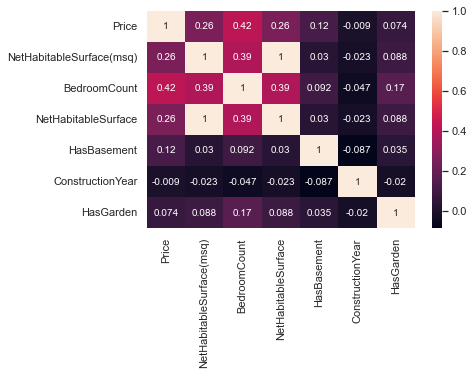

In [1618]:
# To check correction  of Price and for the continous variables using dataset
# pairwise correlation coefficients between two or more (numeric) variables.
# To check correction for the continous variables using dataset

import matplotlib.pyplot as plt

pd.DataFrame(df2, columns = ['Price','NetHabitableSurface', 'BedroomCount', 'ConstructionYear', 'NetHabitableSurface(msq)'])
matrix = df2.corr().round(3)
sns.heatmap(matrix, annot=True)
plt.show()

In [1619]:
df2.columns

Index(['Type', 'Price', 'NetHabitableSurface(msq)', 'BedroomCount', 'Region',
       'NetHabitableSurface', 'HasBasement', 'BuildingCondition',
       'ConstructionYear', 'HeatingType', 'HasGarden', 'KitchekType'],
      dtype='object')

In [1620]:
# Check of crrelation

# NetHabitableSurface(msq)will deleted  or NetHabitableSurface because they are correlated to each other 
corr = df2.corr()
corr.style.background_gradient(cmap='coolwarm')

,Price,NetHabitableSurface(msq),BedroomCount,NetHabitableSurface,HasBasement,ConstructionYear,HasGarden
Price,1.000000,0.256007,0.421420,0.256007,0.119792,-0.009402,0.073680
NetHabitableSurface(msq),0.256007,1.000000,0.387209,1.000000,0.030139,-0.022669,0.087504
BedroomCount,0.421420,0.387209,1.000000,0.387209,0.092197,-0.047368,0.166168
NetHabitableSurface,0.256007,1.000000,0.387209,1.000000,0.030139,-0.022669,0.087504
HasBasement,0.119792,0.030139,0.092197,0.030139,1.000000,-0.087108,0.035204
ConstructionYear,-0.009402,-0.022669,-0.047368,-0.022669,-0.087108,1.000000,-0.020359
HasGarden,0.073680,0.087504,0.166168,0.087504,0.035204,-0.020359,1.000000


In [1621]:
# Dropping the 'NetHabitableSurface(msq) bcs of its correlation with 'NetHabitableSurface
df2 = df2.drop(['NetHabitableSurface(msq)'], axis=1, errors='ignore')
df2.head(10)

,Type,Price,BedroomCount,Region,NetHabitableSurface,HasBasement,BuildingCondition,ConstructionYear,HeatingType,HasGarden,KitchekType
7,HOUSE,590000.0,3.0,Wallonie,1100.0,True,GOOD,1932.0,GAS,False,HYPER_EQUIPPED
12,APARTMENT,350000.0,1.0,Brussels,65.0,False,AS_NEW,2013.0,GAS,False,USA_HYPER_EQUIPPED
29,APARTMENT,279000.0,2.0,Flanders,80.0,False,JUST_RENOVATED,1987.0,ELECTRIC,False,USA_HYPER_EQUIPPED
30,HOUSE,320000.0,4.0,Wallonie,150.0,True,TO_BE_DONE_UP,1954.0,GAS,True,NOT_INSTALLED
31,HOUSE,345000.0,5.0,Wallonie,229.0,True,AS_NEW,1950.0,GAS,False,INSTALLED
33,APARTMENT,395000.0,2.0,Flanders,106.0,False,AS_NEW,1954.0,GAS,False,USA_INSTALLED
47,APARTMENT,250000.0,2.0,Flanders,94.0,True,AS_NEW,2009.0,GAS,True,INSTALLED
49,HOUSE,349000.0,3.0,Flanders,239.0,False,AS_NEW,2000.0,GAS,False,USA_HYPER_EQUIPPED
51,HOUSE,299000.0,4.0,Flanders,145.0,True,AS_NEW,1952.0,GAS,True,USA_INSTALLED
52,HOUSE,485000.0,4.0,Wallonie,216.0,False,AS_NEW,1983.0,FUELOIL,False,INSTALLED


In [1622]:
corr = df2.corr()
corr.style.background_gradient(cmap='coolwarm')

,Price,BedroomCount,NetHabitableSurface,HasBasement,ConstructionYear,HasGarden
Price,1.000000,0.421420,0.256007,0.119792,-0.009402,0.073680
BedroomCount,0.421420,1.000000,0.387209,0.092197,-0.047368,0.166168
NetHabitableSurface,0.256007,0.387209,1.000000,0.030139,-0.022669,0.087504
HasBasement,0.119792,0.092197,0.030139,1.000000,-0.087108,0.035204
ConstructionYear,-0.009402,-0.047368,-0.022669,-0.087108,1.000000,-0.020359
HasGarden,0.073680,0.166168,0.087504,0.035204,-0.020359,1.000000


In [1623]:
corr_df = df2.corr()
corr_df['Price'].abs().sort_values(ascending=False)

Price                  1.000000
BedroomCount           0.421420
NetHabitableSurface    0.256007
HasBasement            0.119792
HasGarden              0.073680
ConstructionYear       0.009402
Name: Price, dtype: float64

In [1624]:
# Dropping the ConstructionYear column with a poor correlation

#df2 = df2.drop(['ConstructionYear'], axis=1)

#df2.head()

In [1625]:
# Converting the string (Type Column  of Houses and Apartment ) into Binaray
df2['Type'] = df2['Type'].replace({'HOUSE':1, 'APARTMENT':0})

df2.head()

,Type,Price,BedroomCount,Region,NetHabitableSurface,HasBasement,BuildingCondition,ConstructionYear,HeatingType,HasGarden,KitchekType
7,1,590000.0,3.0,Wallonie,1100.0,True,GOOD,1932.0,GAS,False,HYPER_EQUIPPED
12,0,350000.0,1.0,Brussels,65.0,False,AS_NEW,2013.0,GAS,False,USA_HYPER_EQUIPPED
29,0,279000.0,2.0,Flanders,80.0,False,JUST_RENOVATED,1987.0,ELECTRIC,False,USA_HYPER_EQUIPPED
30,1,320000.0,4.0,Wallonie,150.0,True,TO_BE_DONE_UP,1954.0,GAS,True,NOT_INSTALLED
31,1,345000.0,5.0,Wallonie,229.0,True,AS_NEW,1950.0,GAS,False,INSTALLED


In [1626]:
df2['HasGarden'] = df2['HasGarden'].replace({True:1, False:0})
df2['HasBasement'] = df2['HasBasement'].replace({True:1, False:0})

In [1627]:
df2.head()

,Type,Price,BedroomCount,Region,NetHabitableSurface,HasBasement,BuildingCondition,ConstructionYear,HeatingType,HasGarden,KitchekType
7,1,590000.0,3.0,Wallonie,1100.0,1,GOOD,1932.0,GAS,0,HYPER_EQUIPPED
12,0,350000.0,1.0,Brussels,65.0,0,AS_NEW,2013.0,GAS,0,USA_HYPER_EQUIPPED
29,0,279000.0,2.0,Flanders,80.0,0,JUST_RENOVATED,1987.0,ELECTRIC,0,USA_HYPER_EQUIPPED
30,1,320000.0,4.0,Wallonie,150.0,1,TO_BE_DONE_UP,1954.0,GAS,1,NOT_INSTALLED
31,1,345000.0,5.0,Wallonie,229.0,1,AS_NEW,1950.0,GAS,0,INSTALLED


In [1628]:
df2.columns

Index(['Type', 'Price', 'BedroomCount', 'Region', 'NetHabitableSurface',
       'HasBasement', 'BuildingCondition', 'ConstructionYear', 'HeatingType',
       'HasGarden', 'KitchekType'],
      dtype='object')

In [1629]:
# Removing Outline Price Value, rmoving price greater than 1995000.0
df2 = df2 [df2 ["Price"]<1900000.0]
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Type,3685.0,0.592673,0.491403,0.0,0.0,1.0,1.0,1.0
Price,3685.0,427651.564993,269658.305611,1385.0,259000.0,349900.0,495000.0,1895000.0
BedroomCount,3685.0,2.988602,1.433234,1.0,2.0,3.0,4.0,39.0
NetHabitableSurface,3685.0,177.095794,312.554301,25.0,100.0,147.0,210.0,17842.0
HasBasement,3685.0,0.511262,0.499941,0.0,0.0,1.0,1.0,1.0
ConstructionYear,3685.0,1972.196744,137.490659,1753.0,1952.0,1972.0,1999.0,9999.0
HasGarden,3685.0,0.421710,0.493900,0.0,0.0,0.0,1.0,1.0


In [1630]:
# Creating a new column(BuildingAge) from the column(ConstructionYear)

# df2['BuildingAge'] = 2022 - df2['ConstructionYear'] 
# df2 = df2.drop('ConstructionYear', axis=1)
# mean_buildingAge = round(df2['BuildingAge'].mean())
# df2.fillna({'BuildingAge':mean_buildingAge},inplace=True)


In [1631]:
df2.columns

Index(['Type', 'Price', 'BedroomCount', 'Region', 'NetHabitableSurface',
       'HasBasement', 'BuildingCondition', 'ConstructionYear', 'HeatingType',
       'HasGarden', 'KitchekType'],
      dtype='object')

In [1632]:
# Creating Dummies for Categorical Variables

df2 = pd.get_dummies(df2, columns=['BuildingCondition', 'HeatingType', 'KitchekType', 'Region'])
df2.head()

,Type,Price,BedroomCount,NetHabitableSurface,HasBasement,ConstructionYear,HasGarden,BuildingCondition_AS_NEW,BuildingCondition_GOOD,BuildingCondition_JUST_RENOVATED,BuildingCondition_TO_BE_DONE_UP,BuildingCondition_TO_RENOVATE,BuildingCondition_TO_RESTORE,HeatingType_CARBON,HeatingType_ELECTRIC,HeatingType_FUELOIL,HeatingType_GAS,HeatingType_PELLET,HeatingType_SOLAR,HeatingType_WOOD,KitchekType_HYPER_EQUIPPED,KitchekType_INSTALLED,KitchekType_NOT_INSTALLED,KitchekType_SEMI_EQUIPPED,KitchekType_USA_HYPER_EQUIPPED,KitchekType_USA_INSTALLED,KitchekType_USA_SEMI_EQUIPPED,KitchekType_USA_UNINSTALLED,Region_Brussels,Region_Flanders,Region_Wallonie
7,1,590000.0,3.0,1100.0,1,1932.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
12,0,350000.0,1.0,65.0,0,2013.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
29,0,279000.0,2.0,80.0,0,1987.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
30,1,320000.0,4.0,150.0,1,1954.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
31,1,345000.0,5.0,229.0,1,1950.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [1633]:
df2.shape

(3685, 31)

In [1634]:
df2.columns

Index(['Type', 'Price', 'BedroomCount', 'NetHabitableSurface', 'HasBasement',
       'ConstructionYear', 'HasGarden', 'BuildingCondition_AS_NEW',
       'BuildingCondition_GOOD', 'BuildingCondition_JUST_RENOVATED',
       'BuildingCondition_TO_BE_DONE_UP', 'BuildingCondition_TO_RENOVATE',
       'BuildingCondition_TO_RESTORE', 'HeatingType_CARBON',
       'HeatingType_ELECTRIC', 'HeatingType_FUELOIL', 'HeatingType_GAS',
       'HeatingType_PELLET', 'HeatingType_SOLAR', 'HeatingType_WOOD',
       'KitchekType_HYPER_EQUIPPED', 'KitchekType_INSTALLED',
       'KitchekType_NOT_INSTALLED', 'KitchekType_SEMI_EQUIPPED',
       'KitchekType_USA_HYPER_EQUIPPED', 'KitchekType_USA_INSTALLED',
       'KitchekType_USA_SEMI_EQUIPPED', 'KitchekType_USA_UNINSTALLED',
       'Region_Brussels', 'Region_Flanders', 'Region_Wallonie'],
      dtype='object')

In [1635]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# #Using OneHotEncoding on the Categorical Variables

# ct = ColumnTransformer([('one-hot-encoder', OneHotEncoder(drop='first'), ['HeatingType', 'BuildingCondition', 'KitchekType'])], remainder='passthrough')
# df2.getdummies 

# # Execute Fit_Transform
# df2 = ct.fit_transform(df2)

In [1636]:
# Creating X and y variables. 
# y variable  equals to price or target and 
# X variables equals to the covariates or features

X = df2 [['Type', 'BedroomCount', 'NetHabitableSurface', 'HasBasement',
       'ConstructionYear', 'HasGarden', 'BuildingCondition_AS_NEW',
       'BuildingCondition_GOOD', 'BuildingCondition_JUST_RENOVATED',
       'BuildingCondition_TO_BE_DONE_UP', 'BuildingCondition_TO_RENOVATE',
       'BuildingCondition_TO_RESTORE', 'HeatingType_CARBON',
       'HeatingType_ELECTRIC', 'HeatingType_FUELOIL', 'HeatingType_GAS',
       'HeatingType_PELLET', 'HeatingType_SOLAR', 'HeatingType_WOOD',
       'KitchekType_HYPER_EQUIPPED', 'KitchekType_INSTALLED',
       'KitchekType_NOT_INSTALLED', 'KitchekType_SEMI_EQUIPPED',
       'KitchekType_USA_HYPER_EQUIPPED', 'KitchekType_USA_INSTALLED',
       'KitchekType_USA_SEMI_EQUIPPED', 'KitchekType_USA_UNINSTALLED',
       'Region_Brussels', 'Region_Flanders', 'Region_Wallonie']]

y = df2 [['Price']]

print(X)
print(y)

       Type  BedroomCount  NetHabitableSurface  HasBasement  ConstructionYear  \
7         1           3.0               1100.0            1            1932.0   
12        0           1.0                 65.0            0            2013.0   
29        0           2.0                 80.0            0            1987.0   
30        1           4.0                150.0            1            1954.0   
31        1           5.0                229.0            1            1950.0   
...     ...           ...                  ...          ...               ...   
20998     1           3.0                165.0            0            2002.0   
20999     1           6.0                193.0            1            1909.0   
21004     1           5.0                236.0            0            2011.0   
21007     0           2.0                 90.0            0            1993.0   
21039     1           3.0                150.0            0            1930.0   

       HasGarden  BuildingC

In [1637]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.2)

print(X_train.shape)
print(y_train.shape)

(2948, 30)
(2948, 1)


In [1638]:
print(X_test.shape)
print(y_test.shape)

(737, 30)
(737, 1)


In [1639]:
df2.head()

,Type,Price,BedroomCount,NetHabitableSurface,HasBasement,ConstructionYear,HasGarden,BuildingCondition_AS_NEW,BuildingCondition_GOOD,BuildingCondition_JUST_RENOVATED,BuildingCondition_TO_BE_DONE_UP,BuildingCondition_TO_RENOVATE,BuildingCondition_TO_RESTORE,HeatingType_CARBON,HeatingType_ELECTRIC,HeatingType_FUELOIL,HeatingType_GAS,HeatingType_PELLET,HeatingType_SOLAR,HeatingType_WOOD,KitchekType_HYPER_EQUIPPED,KitchekType_INSTALLED,KitchekType_NOT_INSTALLED,KitchekType_SEMI_EQUIPPED,KitchekType_USA_HYPER_EQUIPPED,KitchekType_USA_INSTALLED,KitchekType_USA_SEMI_EQUIPPED,KitchekType_USA_UNINSTALLED,Region_Brussels,Region_Flanders,Region_Wallonie
7,1,590000.0,3.0,1100.0,1,1932.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
12,0,350000.0,1.0,65.0,0,2013.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
29,0,279000.0,2.0,80.0,0,1987.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
30,1,320000.0,4.0,150.0,1,1954.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
31,1,345000.0,5.0,229.0,1,1950.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [1640]:
# MODEL_1 

# Fitting the Multiple Linear Regression model

# mlr = LinearRegression()  
# mlr.fit(X_train, y_train)



In [1641]:
# # Model Equation

# #Intercept and Coefficient
# print("Intercept: ", mlr.intercept_)
# print("Coefficients:")
# list(zip(X_train, mlr.coef_))

In [1642]:
# #Prediction of test set
# y_pred_mlr= mlr.predict(X_test)

# #Predicted values
# print("Prediction for test set: {}".format(y_pred_mlr))

In [1643]:
# #Model Evaluation

# from sklearn import metrics

# meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
# meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
# rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

# print('R squared: {:.2f}'.format(mlr.score(X_train, y_train)))
# print('Mean Absolute Error:', meanAbErr)
# print('Mean Square Error:', meanSqErr)
# print('Root Mean Square Error:', rootMeanSqErr)

In [1644]:
# Checking the Regression Score for Multiple Linear Regression 

# mlr.score(X_test, y_test)

In [1645]:
# Moede_2 

# Fitting Random Forest Regression Model

from sklearn.ensemble import RandomForestRegressor

# Initializing the Random Forest Regression model with 10 decision trees
rfr = RandomForestRegressor(max_depth=10, random_state=42)

# Fitting the Random Forest Regression model to the data
rfr.fit(X_train, y_train)

# Prediction
pred = rfr.predict(X_test)

In [1646]:
# Predicting the Price values of the test set
y_pred = rfr.predict(X_test)
y_pred



array([ 484470.14296253,  302169.15735677,  668091.75907954,
        532586.80464695,  316222.79717272,  296335.13957424,
        378929.35778202,  464684.16756375,  479416.79592013,
       1098710.09732826,  502626.17360506,  238513.10867398,
        380161.77973743, 1033444.16303835,  228177.9944071 ,
        226309.41283578,  519123.57323775,  345453.5574155 ,
        196877.53063517,  360827.34005595,  306347.4308788 ,
        262605.95272065,  300353.87755223,  349259.75077733,
        459173.60670183,  412512.32842507,  416788.33281879,
        393556.66972098,  586157.36447565,  392289.95991188,
        346389.3482    ,  441809.88272985,  198476.39740735,
        323426.44783269,  269634.08688221,  441029.71562129,
        280296.67842837,  432220.14990262,  366458.05512387,
        242600.24996096,  544514.86234867,  306215.0553131 ,
        384991.9963051 ,  342750.3484711 ,  265565.98565213,
        513948.91482324,  315833.0190341 ,  295359.08289772,
        323217.7028659 ,

In [1647]:
# Checking the Score for Random Forest Regression

rfr.score(X_test, y_test)

0.6021681377085806

In [1648]:
# Check of Model Performance
from sklearn.metrics import r2_score

# R2 for the Random Forest Regression
r2_score(y_test, y_pred)

#R² score tells us how well our model is fitted to the data by comparing it to the average line of the dependent variable
# If the score is closer to 1, then it indicates that our model performs well versus if the score is farther from 1, then it indicates that our model does not perform so well.

0.6021681377085806

In [1652]:
# RMSE (Root Mean Square Error) for the Random Forest Regression 
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
print("\nRMSE:\n",rmse)
mse = mean_squared_error(y_test, y_pred)
print(mse)



RMSE:
 165509.126
27393270794.04286


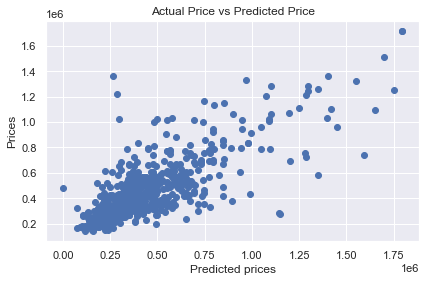

In [1651]:
# A Scatter Plot of the Actual Price versus the Predicted

plt.scatter(x = y_test, y = y_pred)
plt.xlabel("Predicted prices")
plt.ylabel("Prices")
plt.title("Actual Price vs Predicted Price")

plt.tight_layout(pad=1)

plt.show()

###### The error Matrice have reduce 